In [24]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

## 旋转矩阵（rotation matrix）

$$
R(\theta)=\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}
$$

$$
\begin{split}
R(\alpha)\cdot R(\beta)&=\begin{pmatrix}
\cos\alpha & -\sin\alpha\\
\sin\alpha & \cos\alpha
\end{pmatrix}\cdot \begin{pmatrix}
\cos\beta & -\sin\beta\\
\sin\beta & \cos\beta
\end{pmatrix}\\
&=\begin{pmatrix}
\cos\alpha\cos\beta-\sin\alpha\sin\beta & -(\cos\alpha\sin\beta+\sin\alpha\cos\beta)\\ 
\cos\alpha\sin\beta+\sin\alpha\cos\beta& \cos\alpha\cos\beta-\sin\alpha\sin\beta
\end{pmatrix}\\
&=\begin{pmatrix}
\cos(\alpha+\beta) & -\sin(\alpha+\beta)\\
\sin(\alpha+\beta) & \cos(\alpha+\beta)
\end{pmatrix}\\
&=R(\alpha+\beta)
\end{split}
$$

- $\|R(\theta)\|=1$，行列式为1
- 乘以一个向量，
    - 不改变其长度（norm）
    - 只改变其角度（只进行旋转）
    - 为逆时针旋转
        - 旋转角度 $\theta$ 为其与 $x$ 轴正方向的夹角

### 作用于向量

    
$$
\cos\theta=\frac{a\cdot b}{\|a\|\|b\|}
$$

In [2]:
def rot_matrix(theta):
    return np.asarray([[np.cos(theta), -np.sin(theta)],
                       [np.sin(theta), np.cos(theta)]])

In [3]:
x = np.asarray([1, 0])

In [90]:
# 逆时针旋转30度
R1 = rot_matrix(np.pi/6)
R1

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [6]:
x_prime = R1.dot(x)
x_prime

array([0.8660254, 0.5      ])

(-0.5, 1.5)

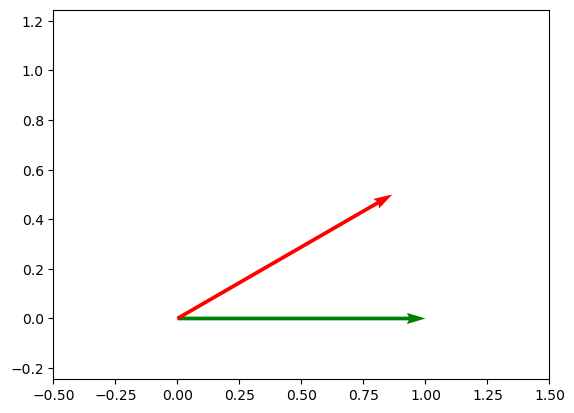

In [77]:
plt.quiver([0, 0], [0, 0], [x[0], x_prime[0]], [x[1], x_prime[1]], 
           angles="xy", scale_units="xy", scale=1, color=['g', 'r'])
plt.axis('equal')
plt.xlim(-.5, 1.5)
plt.ylim(-.5, 1.5)

In [91]:
# 长度
np.linalg.norm(x_prime)

0.9999999999999999

In [8]:
# 角度
x_prime.dot(x) / (np.linalg.norm(x_prime) * np.linalg.norm(x))

0.8660254037844387

In [9]:
np.cos(np.pi/6)

0.8660254037844386

### 旋转矩阵连乘

In [10]:
R2 = rot_matrix(np.pi/6)

In [12]:
x_prime2 = R2.dot(R1).dot(x)
x_prime2

array([0.5      , 0.8660254])

In [13]:
np.linalg.norm(x_prime2)

0.9999999999999998

In [14]:
# 角度
x_prime2.dot(x) / (np.linalg.norm(x_prime2) * np.linalg.norm(x))

0.5000000000000001

In [15]:
np.cos(np.pi/6 + np.pi/6)

0.5000000000000001

(-0.5, 1.5)

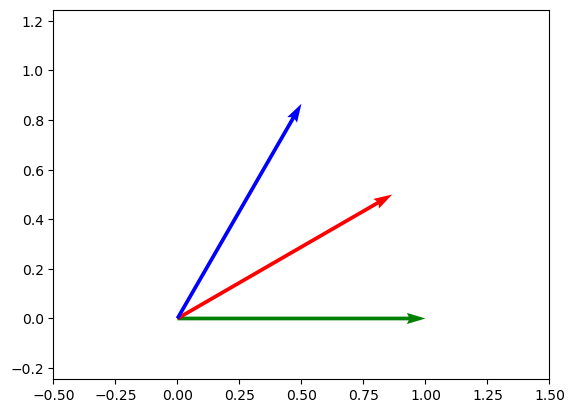

In [75]:
plt.quiver([0, 0, 0], [0, 0, 0], 
           [x[0], x_prime[0], x_prime2[0]], 
           [x[1], x_prime[1], x_prime2[1]], 
           angles="xy", scale_units="xy", scale=1, color=['g', 'r', 'b'])
plt.axis('equal')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)

### 复平面（complex plane）

- $z=a+ib$
    - $r=1, a=\cos\theta, b=\sin\theta$
    - $z=\cos\theta + i\sin\theta$

$$
\begin{split}
R(\theta)&=\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}\\
&=\cos\theta+ i\sin\theta=e^{i\theta}
\end{split}
$$

$$
\begin{split}
R(\theta)\begin{pmatrix}
x\\
y
\end{pmatrix}&=\begin{pmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{pmatrix}\begin{pmatrix}
x\\
y
\end{pmatrix}=\begin{pmatrix}
\cos\theta x-\sin\theta y\\
\sin\theta x+\cos\theta y
\end{pmatrix}\\
&=(\cos\theta+i\sin\theta)(x+iy)\\
&=(\cos\theta x - \sin\theta y)+i(\sin\theta x+\cos\theta y)
\end{split}
$$

In [78]:
x

array([1, 0])

In [89]:
# 旋转30度
rot = np.cos(np.pi/6) + 1j*np.sin(np.pi/6)
print(np.real(rot * (x[0]+1j*x[1])))
print(np.imag(rot * (x[0]+1j*x[1])))

# 旋转30度，两次
rot = rot*rot
print(np.real(rot * (x[0]+1j*x[1])))
print(np.imag(rot * (x[0]+1j*x[1])))

0.8660254037844386
0.4999999999999999
0.5
0.8660254037844384


## 旋转坐标系

$$
\begin{pmatrix}
\cos\theta & \sin\theta\\
-\sin\theta & \cos\theta
\end{pmatrix}
$$

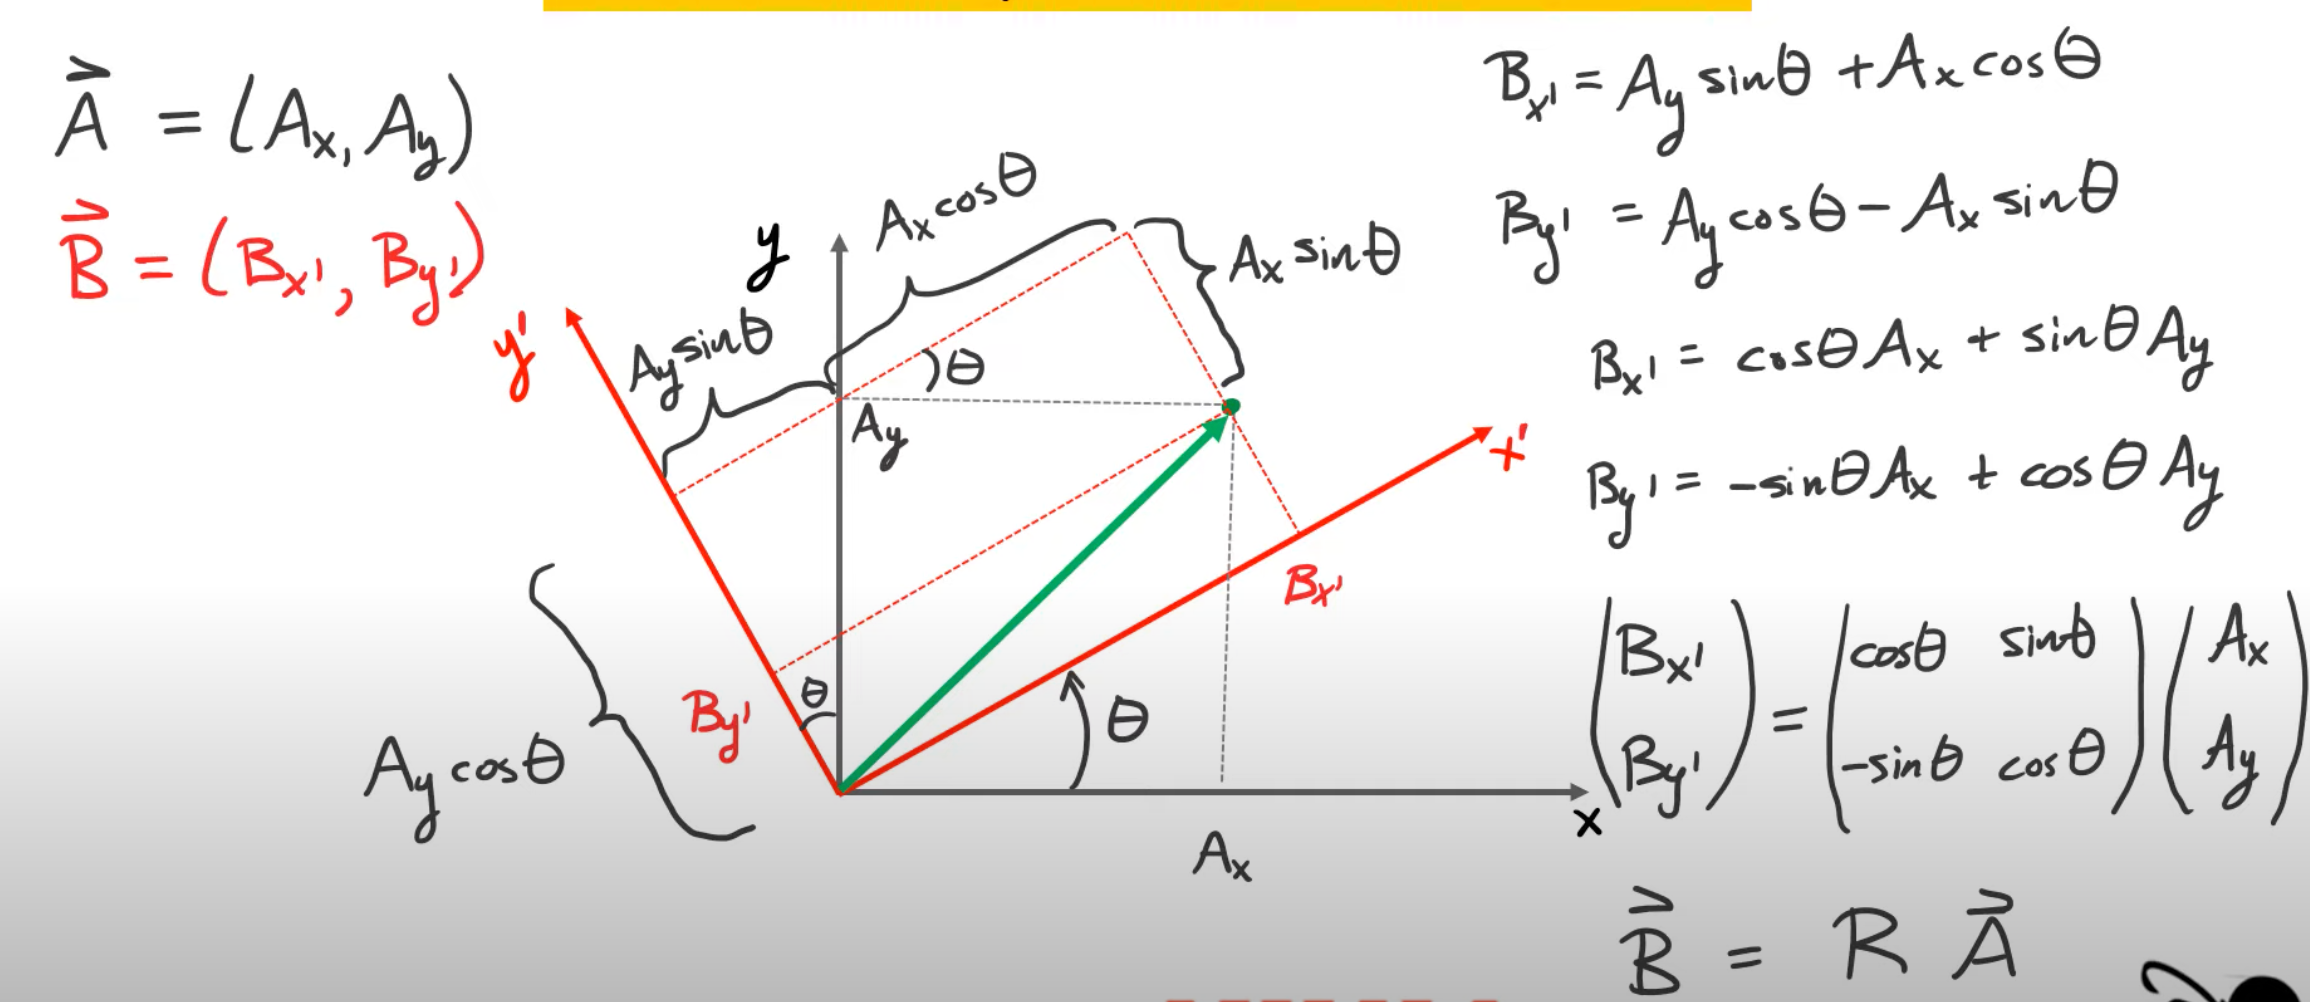

In [76]:
Image('../../imgs/rotation_matrix.png', width=600)